In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

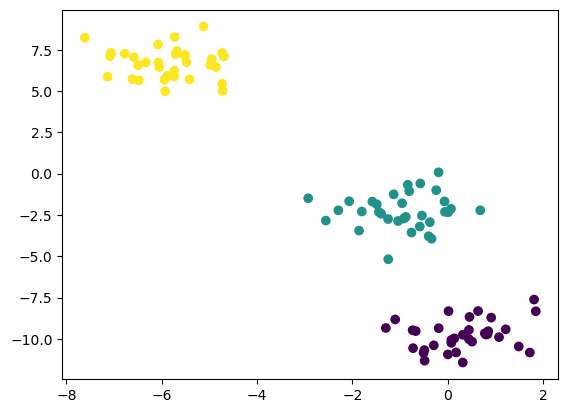

In [4]:
x,y= make_blobs()
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
n_cluster = 3
itera  = 100


<!-- decide & cluster 
select random centorid
assign cluster
move centroid
check finish -->

In [23]:
 
def dist(i,x1,x2):
    return np.sqrt((i[1]-x2)**2 + (i[0]-x1)**2)
def get_scatter(x,cluster_group,centroid,ax):
    if x.shape[1] == 2 :
        ax.scatter(x[:,0],x[:,1],c = cluster_group)
        for i in centroid:
            ax.scatter(i[0],i[1], marker='X')
    else :
        print("can't print multidemsiot")
       
def assign_cluster(x,centroid):
    y_cen = []
    for i in x:
        dist = []
        for j in centroid:
            dist.append(np.sqrt(np.dot(i-j,i-j)))
        y_cen.append((dist.index(min(dist))))
        # print(ans_min)
        # y_cen.append(ans_min)

    return np.array(y_cen)


y_cen = assign_cluster(x,list(tuple(x[1])))
y_cen

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [28]:

def move_centroid(x,y_cen):
      new_centroid = []
      for i in np.unique(y_cen):
         value = x[y_cen==i].mean(axis=0)
         new_centroid.append(value)
      return new_centroid
def Kmean(x,n_cluster=2,iter = 100):
   n_cluster = n_cluster
   itera  = iter
   idx = np.random.randint(0,len(x),n_cluster)
 

   centroid = x[idx]
   cluster_group = np.zeros(len(x))

   
   centroids_history = [ centroid.copy()]
   clusters_history = [ cluster_group.copy()]

   for _ in range( iter):
      cluster_group =  assign_cluster(x,centroid)
      new_centroid =  move_centroid(x, cluster_group)

      centroids_history.append(new_centroid.copy())
      clusters_history.append(cluster_group.copy())

      
      if np.allclose( centroid, new_centroid):
            print("iteration stop at ",_+1)
            break
      centroid = new_centroid

      

   
      fig,ax = plt.subplots()
      get_scatter(x,cluster_group,centroid,ax)
      



iteration stop at  4


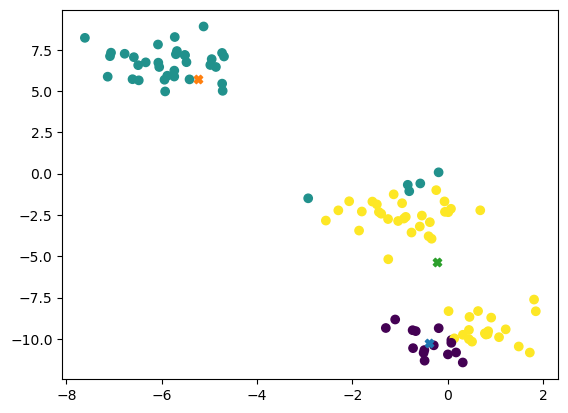

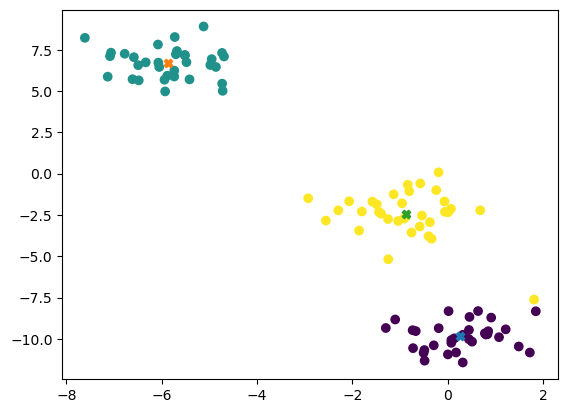

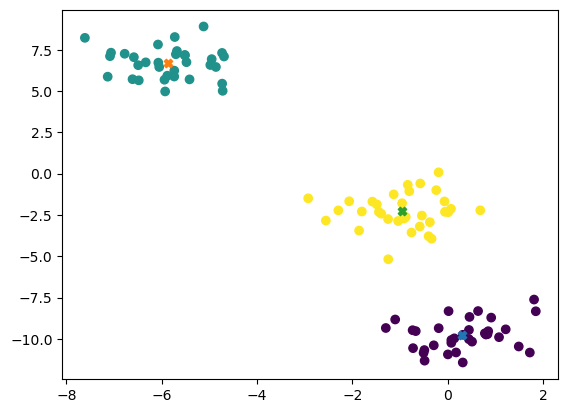

In [29]:
Kmean(x,n_cluster=3)
# y_cen

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


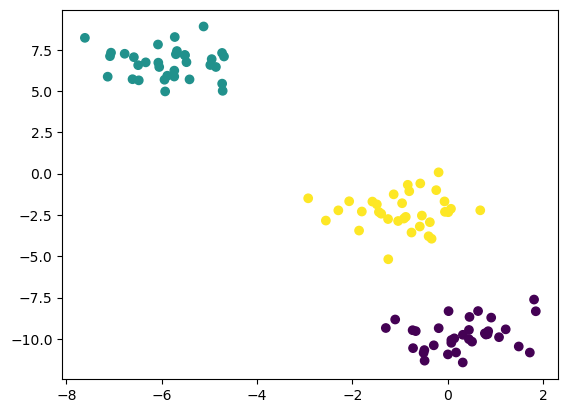

In [51]:
from sklearn.cluster import KMeans
km = KMeans(3)
a = km.fit_predict(x)
a
plt.scatter(x[:,0],x[:,1],c= a)
# plt.scatter( )
